In [8]:
import os
print(os.getcwd())
print(os.path.abspath('../pyEpiabm'))

import sys
sys.path.append(os.path.abspath('../pyEpiabm'))
import pyEpiabm as pe
import pandas as pd
import matplotlib.pyplot as plt

/home/sabsr3/software_engineering/epiabm/python_examples
/home/sabsr3/software_engineering/epiabm/pyEpiabm


In [9]:
pop_params = {"population_size": 100, "cell_number": 1,
              "microcell_number": 1, "household_number": 1,
              "if_households": True}

sim_params = {"simulation_start_time": 0, "simulation_end_time": 40,
              "initial_infected_number": 5}

file_params = {"output_file": "output.csv",
               "output_dir": "./simulation_outputs"}


In [10]:
pe.Parameters.instance().time_steps_per_day = 1

population = pe.ToyPopulationFactory().make_pop(**pop_params)


In [11]:
sim = pe.Simulation()
sim.configure(
    population,
    [pe.InitialInfectedSweep()],
    [pe.UpdatePlaceSweep(), pe.HouseholdSweep(), pe.PlaceSweep(),
     pe.QueueSweep(), pe.HostProgressionSweep()],
    sim_params,
    file_params)

sim.run_sweeps()
del(sim)

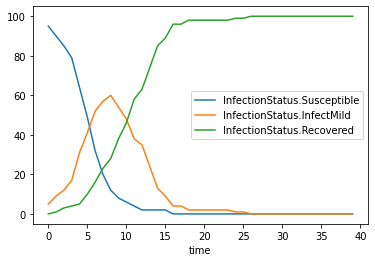

In [12]:
df = pd.read_csv("simulation_outputs/output.csv")
df.plot(x="time", y=["InfectionStatus.Susceptible", "InfectionStatus.InfectMild", 
                     "InfectionStatus.Recovered"])
plt.show()